1.Data Preparation

In [ ]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

Data Loading


In [ ]:
#Displaying Datasets
df1 = pd.read_parquet('/content/Hourly_Gasoline_Prices.parquet')

In [ ]:
#Displaying Datasets
df1


,Id,isSelf,Price,Date
0,51169,1,1.943,2022-01-01 11:45:53
1,44566,1,1.725,2022-01-02 11:15:08
2,44566,0,1.775,2022-01-02 11:15:08
3,20026,1,1.729,2022-01-02 11:27:01
4,12494,0,1.559,2022-01-02 12:07:25
...,...,...,...,...
2503660,48073,0,1.869,2022-12-31 07:59:50
2503661,48073,1,1.639,2022-12-31 07:59:50
2503662,27829,0,1.659,2022-12-31 07:59:55
2503663,14415,1,1.619,2022-12-31 07:59:57


Data Cleaning

Analysis and Predictions to be done for 6 Months

In [ ]:
df1=df1.iloc[1:1205548]

In [ ]:
df1

,Id,isSelf,Price,Date
1,44566,1,1.725,2022-01-02 11:15:08
2,44566,0,1.775,2022-01-02 11:15:08
3,20026,1,1.729,2022-01-02 11:27:01
4,12494,0,1.559,2022-01-02 12:07:25
5,12494,1,1.559,2022-01-02 12:07:25
...,...,...,...,...
1205543,11159,0,2.309,2022-06-30 09:06:38
1205544,11159,1,2.089,2022-06-30 09:06:38
1205545,49854,1,2.084,2022-06-30 18:20:23
1205546,49854,0,2.337,2022-06-30 18:20:23


In [ ]:
df1.head(50)

,Id,isSelf,Price,Date
1,44566,1,1.725,2022-01-02 11:15:08
2,44566,0,1.775,2022-01-02 11:15:08
3,20026,1,1.729,2022-01-02 11:27:01
4,12494,0,1.559,2022-01-02 12:07:25
5,12494,1,1.559,2022-01-02 12:07:25
6,37593,0,1.789,2022-01-02 12:36:25
7,37593,1,1.789,2022-01-02 12:36:25
8,50047,0,1.879,2022-01-02 14:20:37
9,52185,0,1.800,2022-01-02 17:25:08
10,52185,1,1.800,2022-01-02 17:25:08


In [ ]:
df1.tail(50)

,Id,isSelf,Price,Date
1205498,41857,0,2.269,2022-06-30 07:58:01
1205499,17294,1,2.049,2022-06-30 07:58:01
1205500,42118,1,2.049,2022-06-30 07:58:01
1205501,42118,0,2.149,2022-06-30 07:58:01
1205502,36486,1,2.059,2022-06-30 07:58:01
1205503,17125,1,2.099,2022-06-30 07:58:02
1205504,17125,0,2.099,2022-06-30 07:58:02
1205505,47326,1,2.029,2022-06-30 07:58:02
1205506,47326,0,2.029,2022-06-30 07:58:02
1205507,19686,1,2.036,2022-06-30 07:58:06


In [ ]:
df1 = df1.copy()

In [ ]:
df2 = pd.read_parquet('/content/Fuel_Station_Information.parquet')

In [ ]:
df2

,Id,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine
0,53637,ODELLI LUCIA,Pompe Bianche,Stradale,None,None,NaN,NaN
1,52829,ERRA NICOLA,Api-Ip,Stradale,None,None,40.716039,14.941328
2,52614,FONZI PAOLO,Api-Ip,Stradale,stazione di servizio IP di Fonzi Paolo,None,NaN,NaN
3,53552,KHALIL NOMAN,Agip Eni,Stradale,None,CINISELLO BALSAMO,NaN,NaN
4,23778,ALFONSO DI BENEDETTO CARBURANTI LUBRIFICANTI SRL,Sicilpetroli,Stradale,A. Di Benedetto srl Via Imera Ag,AGRIGENTO,37.312391,13.585913
...,...,...,...,...,...,...,...,...
15746,49378,MESTERIO COLLECTION DI ALI TITAS,Api-Ip,Stradale,IP - ROMA OSTIENSE 195,ROMA,41.867424,12.488862
5444,54066,Sepa,SEPA,Stradale,Sepa,BELPASSO,37.538046,14.983081
19628,53343,FUEL SERVICE S.A.S. DI VALENTI MARIO & C.,Api-Ip,Stradale,IP BUTTRIO - FUEL SERVICE,BUTTRIO,46.008876,13.330827
21228,53953,LORO F.LLI SPA - MOZZECANE VR,Loro,Stradale,LORO F.LLI SPA - MOZZECANE VR,MOZZECANE,45.313659,10.821221


In [ ]:
df2=df2.copy()

In [ ]:
df2.head(50)

,Id,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine
0,53637,ODELLI LUCIA,Pompe Bianche,Stradale,None,None,NaN,NaN
1,52829,ERRA NICOLA,Api-Ip,Stradale,None,None,40.716039,14.941328
2,52614,FONZI PAOLO,Api-Ip,Stradale,stazione di servizio IP di Fonzi Paolo,None,NaN,NaN
3,53552,KHALIL NOMAN,Agip Eni,Stradale,None,CINISELLO BALSAMO,NaN,NaN
4,23778,ALFONSO DI BENEDETTO CARBURANTI LUBRIFICANTI SRL,Sicilpetroli,Stradale,A. Di Benedetto srl Via Imera Ag,AGRIGENTO,37.312391,13.585913
5,49195,EOS SERVICES S.R.L. A SOCIO UNICO,Q8,Stradale,AG021,AGRIGENTO,37.298234,13.589792
6,49460,EOS SERVICES S.R.L. A SOCIO UNICO,Q8,Stradale,AG023,AGRIGENTO,37.326120,13.591820
7,49459,EOS SERVICES S.R.L. A SOCIO UNICO,Q8,Stradale,AG024,AGRIGENTO,37.274324,13.614224
8,49199,EOS SERVICES S.R.L. A SOCIO UNICO,Q8,Stradale,AG025,AGRIGENTO,37.277103,13.610695
9,49196,EOS SERVICES S.R.L. A SOCIO UNICO,Q8,Stradale,AG027,AGRIGENTO,37.314948,13.571371


In [ ]:
df2.tail(50)

,Id,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine
5414,50739,CUSIMANO SALVATORE,Pompe Bianche,Stradale,IDC DI CUSIMANO SALV. P.ZA PALESTRO,CATANIA,37.499854,15.073576
5415,50735,CUSIMANO SALVATORE,Pompe Bianche,Stradale,IDC DI CUSIMANO SALVATORE,CATANIA,37.504910,15.081298
5731,50065,MARTINO S.R.L.,Pompe Bianche,Stradale,MARTINO FUEL,LAMEZIA TERME,38.912236,16.334224
5800,53453,REGALGAS - MAMMOLA,Pompe Bianche,Stradale,REGALGAS - MAMMOLA,ASSORO,38.357917,16.229738
5822,19501,SALVATORE GRILLO S.R.L.,Esso,Stradale,Salvatore Grillo s.r.l.,ENNA,37.560112,14.295166
6604,3709,Ecar - Etrusca Carburanti s.a.s.,Api-Ip,Autostradale,ARNO OVEST,REGGELLO,43.650041,11.464443
7942,27748,eni,Agip Eni,Stradale,eni,POGGIARDO,40.051995,18.384760
8372,45718,MARCHIONE PANCRAZIO,Agip Eni,Stradale,16721,GAETA,41.236091,13.568931
8787,31292,Coltro Loredano - P.V. 8046,Tamoil,Stradale,Coltro Loredano - P.V. 8046,DESIO,45.626238,9.205926
9634,38255,PINTO GIUSEPPE,Api-Ip,Stradale,IP,MILANO,45.492457,9.146824


In [ ]:
df= pd.merge(df1,df2, on='Id',how='left')

In [ ]:
df

,Id,isSelf,Price,Date,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine
0,44566,1,1.725,2022-01-02 11:15:08,BOVE SOCIETA' A RESPONSABILITA' LIMITATA SEMPL...,Esso,Stradale,EASY,GALLIPOLI,40.059118,18.032323
1,44566,0,1.775,2022-01-02 11:15:08,BOVE SOCIETA' A RESPONSABILITA' LIMITATA SEMPL...,Esso,Stradale,EASY,GALLIPOLI,40.059118,18.032323
2,20026,1,1.729,2022-01-02 11:27:01,FIARDI TRADING - SOCIETA' A RESPONSABILITA' LI...,Api-Ip,Stradale,IP,CAMPOMARINO,41.938508,15.076976
3,12494,0,1.559,2022-01-02 12:07:25,BUSSINELLO S.R.L.,Pompe Bianche,Stradale,Impianto Verona Petroli - San Bonifacio,SAN BONIFACIO,45.386059,11.273766
4,12494,1,1.559,2022-01-02 12:07:25,BUSSINELLO S.R.L.,Pompe Bianche,Stradale,Impianto Verona Petroli - San Bonifacio,SAN BONIFACIO,45.386059,11.273766
...,...,...,...,...,...,...,...,...,...,...,...
1205542,11159,0,2.309,2022-06-30 09:06:38,MODENA S.A.S. DI MODENA NICOLA & C.,Agip Eni,Stradale,eni,SANT'AMBROGIO DI VALPOLICELLA,45.525919,10.816606
1205543,11159,1,2.089,2022-06-30 09:06:38,MODENA S.A.S. DI MODENA NICOLA & C.,Agip Eni,Stradale,eni,SANT'AMBROGIO DI VALPOLICELLA,45.525919,10.816606
1205544,49854,1,2.084,2022-06-30 18:20:23,CAMEL EXPRESS S.R.L.,Api-Ip,Stradale,IP,PESSANO CON BORNAGO,45.546679,9.392951
1205545,49854,0,2.337,2022-06-30 18:20:23,CAMEL EXPRESS S.R.L.,Api-Ip,Stradale,IP,PESSANO CON BORNAGO,45.546679,9.392951


In [ ]:
df.head(50)

,Id,isSelf,Price,Date,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine
0,44566,1,1.725,2022-01-02 11:15:08,BOVE SOCIETA' A RESPONSABILITA' LIMITATA SEMPL...,Esso,Stradale,EASY,GALLIPOLI,40.059118,18.032323
1,44566,0,1.775,2022-01-02 11:15:08,BOVE SOCIETA' A RESPONSABILITA' LIMITATA SEMPL...,Esso,Stradale,EASY,GALLIPOLI,40.059118,18.032323
2,20026,1,1.729,2022-01-02 11:27:01,FIARDI TRADING - SOCIETA' A RESPONSABILITA' LI...,Api-Ip,Stradale,IP,CAMPOMARINO,41.938508,15.076976
3,12494,0,1.559,2022-01-02 12:07:25,BUSSINELLO S.R.L.,Pompe Bianche,Stradale,Impianto Verona Petroli - San Bonifacio,SAN BONIFACIO,45.386059,11.273766
4,12494,1,1.559,2022-01-02 12:07:25,BUSSINELLO S.R.L.,Pompe Bianche,Stradale,Impianto Verona Petroli - San Bonifacio,SAN BONIFACIO,45.386059,11.273766
5,37593,0,1.789,2022-01-02 12:36:25,CARBURANTI PALAZZO S.N.C.,Ies,Stradale,CARBURANTI PALAZZO SNC,BARANELLO,41.516827,14.594655
6,37593,1,1.789,2022-01-02 12:36:25,CARBURANTI PALAZZO S.N.C.,Ies,Stradale,CARBURANTI PALAZZO SNC,BARANELLO,41.516827,14.594655
7,50047,0,1.879,2022-01-02 14:20:37,DI BENEDETTO MARIA AGATA,SP Energia Siciliana,Stradale,stzione di servizio Di Benedetto Maria Agata,VENTIMIGLIA DI SICILIA,37.920051,13.565093
8,52185,0,1.800,2022-01-02 17:25:08,PIRA GIANPAOLO,Q8,Stradale,PIRA GIANPAOLO,BITTI,40.476894,9.382334
9,52185,1,1.800,2022-01-02 17:25:08,PIRA GIANPAOLO,Q8,Stradale,PIRA GIANPAOLO,BITTI,40.476894,9.382334


In [ ]:
df.tail(50)

,Id,isSelf,Price,Date,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine
1205497,41857,0,2.269,2022-06-30 07:58:01,ALA CARBURANTI S.R.L.,Esso,Stradale,PV MOLAZZANA,MOLAZZANA,44.081302,10.443308
1205498,17294,1,2.049,2022-06-30 07:58:01,GALATA' FRANCESCO ANTONIO,Tamoil,Stradale,TAMOIL,ROSARNO,38.470834,16.004355
1205499,42118,1,2.049,2022-06-30 07:58:01,EL ZAATARI SOBHI,Tamoil,Stradale,TAMOIL DI EL ZAATARI SOBHI,VILLORBA,45.719297,12.285195
1205500,42118,0,2.149,2022-06-30 07:58:01,EL ZAATARI SOBHI,Tamoil,Stradale,TAMOIL DI EL ZAATARI SOBHI,VILLORBA,45.719297,12.285195
1205501,36486,1,2.059,2022-06-30 07:58:01,ENI FUEL S.P.A.,Agip Eni,Stradale,PV 02412 Gaggiano,GAGGIANO,45.405470,9.014216
1205502,17125,1,2.099,2022-06-30 07:58:02,CHESSEDDU ANTONIO,Tamoil,Stradale,Tamoil Antonio Chesseddu,THIESI,40.520312,8.727571
1205503,17125,0,2.099,2022-06-30 07:58:02,CHESSEDDU ANTONIO,Tamoil,Stradale,Tamoil Antonio Chesseddu,THIESI,40.520312,8.727571
1205504,47326,1,2.029,2022-06-30 07:58:02,Stazione di rifornimento Fremar Assago,Pompe Bianche,Stradale,Stazione di rifornimento Fremar Assago,ASSAGO,45.402425,9.155805
1205505,47326,0,2.029,2022-06-30 07:58:02,Stazione di rifornimento Fremar Assago,Pompe Bianche,Stradale,Stazione di rifornimento Fremar Assago,ASSAGO,45.402425,9.155805
1205506,19686,1,2.036,2022-06-30 07:58:06,CUTRUPI GIUSEPPE STAZIONE SERVIZIO ESSO,Esso,Stradale,stazione esso,BOLOGNA,44.494574,11.400041


In [ ]:
df=df.copy()

In [ ]:
df.shape

(1205547, 11)

In [ ]:
df.dtypes

Id                               int64
isSelf                           int64
Price                          float64
Date                    datetime64[ns]
Fuel_station_manager            object
Petrol_company                  object
Type                            object
Station_name                    object
City                            object
Latitude                       float64
Longitudine                    float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205547 entries, 0 to 1205546
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Id                    1205547 non-null  int64         
 1   isSelf                1205547 non-null  int64         
 2   Price                 1205547 non-null  float64       
 3   Date                  1205547 non-null  datetime64[ns]
 4   Fuel_station_manager  1194415 non-null  object        
 5   Petrol_company        1194415 non-null  object        
 6   Type                  1194415 non-null  object        
 7   Station_name          1194320 non-null  object        
 8   City                  1194313 non-null  object        
 9   Latitude              1194161 non-null  float64       
 10  Longitudine           1194161 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 110.4+ MB


Data Cleaning

In [ ]:
#Checking for missing value
df.isnull().sum()

Id                          0
isSelf                      0
Price                       0
Date                        0
Fuel_station_manager    11132
Petrol_company          11132
Type                    11132
Station_name            11227
City                    11234
Latitude                11386
Longitudine             11386
dtype: int64

In [ ]:
df[df['isSelf']==0].count()

Id                      459790
isSelf                  459790
Price                   459790
Date                    459790
Fuel_station_manager    454865
Petrol_company          454865
Type                    454865
Station_name            454842
City                    454819
Latitude                454743
Longitudine             454743
dtype: int64

In [ ]:
df[df['isSelf']==1].count()

Id                      745757
isSelf                  745757
Price                   745757
Date                    745757
Fuel_station_manager    739550
Petrol_company          739550
Type                    739550
Station_name            739478
City                    739494
Latitude                739418
Longitudine             739418
dtype: int64

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [ ]:
percent_missing

Id                      0.000000
isSelf                  0.000000
Price                   0.000000
Date                    0.000000
Fuel_station_manager    0.923398
Petrol_company          0.923398
Type                    0.923398
Station_name            0.931278
City                    0.931859
Latitude                0.944468
Longitudine             0.944468
dtype: float64

In [ ]:
df.describe()

,Id,isSelf,Price,Latitude,Longitudine
count,1.205547e+06,1.205547e+06,1.205547e+06,1.194161e+06,1.194161e+06
mean,3.268444e+04,6.186047e-01,1.901462e+00,4.297684e+01,1.209022e+01
std,1.518934e+04,4.857295e-01,1.740296e-01,2.550102e+00,2.611821e+00
min,3.464000e+03,0.000000e+00,7.390000e-01,2.243470e+00,6.709295e+00
25%,1.983200e+04,0.000000e+00,1.769000e+00,4.105230e+01,9.998547e+00
50%,3.498800e+04,1.000000e+00,1.879000e+00,4.369424e+01,1.208737e+01
75%,4.657300e+04,1.000000e+00,2.029000e+00,4.528912e+01,1.405323e+01
max,5.510800e+04,1.000000e+00,4.000000e+00,4.694694e+01,1.849637e+01


In [ ]:
df

,Id,isSelf,Price,Date,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine
0,44566,1,1.725,2022-01-02 11:15:08,BOVE SOCIETA' A RESPONSABILITA' LIMITATA SEMPL...,Esso,Stradale,EASY,GALLIPOLI,40.059118,18.032323
1,44566,0,1.775,2022-01-02 11:15:08,BOVE SOCIETA' A RESPONSABILITA' LIMITATA SEMPL...,Esso,Stradale,EASY,GALLIPOLI,40.059118,18.032323
2,20026,1,1.729,2022-01-02 11:27:01,FIARDI TRADING - SOCIETA' A RESPONSABILITA' LI...,Api-Ip,Stradale,IP,CAMPOMARINO,41.938508,15.076976
3,12494,0,1.559,2022-01-02 12:07:25,BUSSINELLO S.R.L.,Pompe Bianche,Stradale,Impianto Verona Petroli - San Bonifacio,SAN BONIFACIO,45.386059,11.273766
4,12494,1,1.559,2022-01-02 12:07:25,BUSSINELLO S.R.L.,Pompe Bianche,Stradale,Impianto Verona Petroli - San Bonifacio,SAN BONIFACIO,45.386059,11.273766
...,...,...,...,...,...,...,...,...,...,...,...
1205542,11159,0,2.309,2022-06-30 09:06:38,MODENA S.A.S. DI MODENA NICOLA & C.,Agip Eni,Stradale,eni,SANT'AMBROGIO DI VALPOLICELLA,45.525919,10.816606
1205543,11159,1,2.089,2022-06-30 09:06:38,MODENA S.A.S. DI MODENA NICOLA & C.,Agip Eni,Stradale,eni,SANT'AMBROGIO DI VALPOLICELLA,45.525919,10.816606
1205544,49854,1,2.084,2022-06-30 18:20:23,CAMEL EXPRESS S.R.L.,Api-Ip,Stradale,IP,PESSANO CON BORNAGO,45.546679,9.392951
1205545,49854,0,2.337,2022-06-30 18:20:23,CAMEL EXPRESS S.R.L.,Api-Ip,Stradale,IP,PESSANO CON BORNAGO,45.546679,9.392951


In [ ]:
#Setting Date Column as an index
df = df.set_index('Date')
print("Df shape:",df.shape)

Df shape: (1205547, 10)


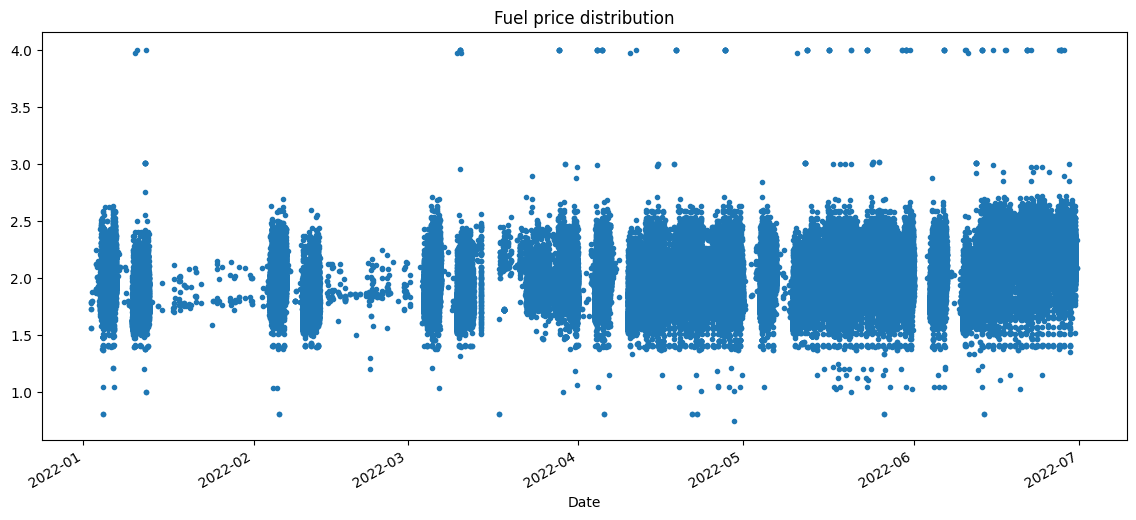

In [ ]:
plt.figure(figsize = (14,6))
df.Price.plot(kind ="line",style = ".")
plt.title("Fuel price distribution")
plt.show()

In [ ]:
df.describe()

,Id,isSelf,Price,Latitude,Longitudine
count,1.205547e+06,1.205547e+06,1.205547e+06,1.194161e+06,1.194161e+06
mean,3.268444e+04,6.186047e-01,1.901462e+00,4.297684e+01,1.209022e+01
std,1.518934e+04,4.857295e-01,1.740296e-01,2.550102e+00,2.611821e+00
min,3.464000e+03,0.000000e+00,7.390000e-01,2.243470e+00,6.709295e+00
25%,1.983200e+04,0.000000e+00,1.769000e+00,4.105230e+01,9.998547e+00
50%,3.498800e+04,1.000000e+00,1.879000e+00,4.369424e+01,1.208737e+01
75%,4.657300e+04,1.000000e+00,2.029000e+00,4.528912e+01,1.405323e+01
max,5.510800e+04,1.000000e+00,4.000000e+00,4.694694e+01,1.849637e+01


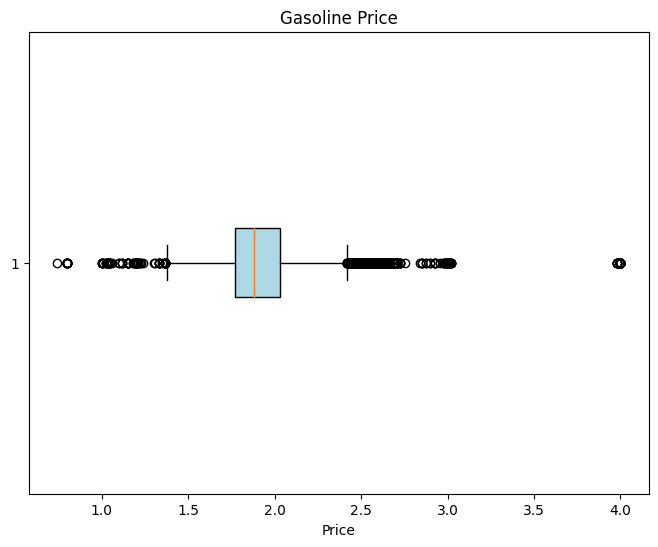

In [ ]:
#Visual Inspection for Identifying Outliers in the DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(df['Price'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Price')
plt.title('Gasoline Price')
plt.show()

In [ ]:
#Removing Outliers by Filtering
max_price = df.Price.max()
min_price = df.Price.min()
print('The Highest Price in Gasoline',max_price)
print('The Lowest Price in Gasoline',min_price)

The Highest Price in Gasoline 4.0
The Lowest Price in Gasoline 0.739


In [ ]:
df=df.loc[(df.Price<4)&(df.Price>0.7)]
df.describe()

,Id,isSelf,Price,Latitude,Longitudine
count,1.205459e+06,1.205459e+06,1.205459e+06,1.194073e+06,1.194073e+06
mean,3.268371e+04,6.186075e-01,1.901309e+00,4.297703e+01,1.208990e+01
std,1.518925e+04,4.857288e-01,1.731098e-01,2.550085e+00,2.611556e+00
min,3.464000e+03,0.000000e+00,7.390000e-01,2.243470e+00,6.709295e+00
25%,1.983200e+04,0.000000e+00,1.769000e+00,4.105245e+01,9.998056e+00
50%,3.498400e+04,1.000000e+00,1.879000e+00,4.369424e+01,1.208737e+01
75%,4.657100e+04,1.000000e+00,2.029000e+00,4.528912e+01,1.405227e+01
max,5.510800e+04,1.000000e+00,3.978000e+00,4.694694e+01,1.849637e+01


In [ ]:
df

,Id,isSelf,Price,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine
Date,,,,,,,,,,
2022-01-02 11:15:08,44566,1,1.725,BOVE SOCIETA' A RESPONSABILITA' LIMITATA SEMPL...,Esso,Stradale,EASY,GALLIPOLI,40.059118,18.032323
2022-01-02 11:15:08,44566,0,1.775,BOVE SOCIETA' A RESPONSABILITA' LIMITATA SEMPL...,Esso,Stradale,EASY,GALLIPOLI,40.059118,18.032323
2022-01-02 11:27:01,20026,1,1.729,FIARDI TRADING - SOCIETA' A RESPONSABILITA' LI...,Api-Ip,Stradale,IP,CAMPOMARINO,41.938508,15.076976
2022-01-02 12:07:25,12494,0,1.559,BUSSINELLO S.R.L.,Pompe Bianche,Stradale,Impianto Verona Petroli - San Bonifacio,SAN BONIFACIO,45.386059,11.273766
2022-01-02 12:07:25,12494,1,1.559,BUSSINELLO S.R.L.,Pompe Bianche,Stradale,Impianto Verona Petroli - San Bonifacio,SAN BONIFACIO,45.386059,11.273766
...,...,...,...,...,...,...,...,...,...,...
2022-06-30 09:06:38,11159,0,2.309,MODENA S.A.S. DI MODENA NICOLA & C.,Agip Eni,Stradale,eni,SANT'AMBROGIO DI VALPOLICELLA,45.525919,10.816606
2022-06-30 09:06:38,11159,1,2.089,MODENA S.A.S. DI MODENA NICOLA & C.,Agip Eni,Stradale,eni,SANT'AMBROGIO DI VALPOLICELLA,45.525919,10.816606
2022-06-30 18:20:23,49854,1,2.084,CAMEL EXPRESS S.R.L.,Api-Ip,Stradale,IP,PESSANO CON BORNAGO,45.546679,9.392951


In [ ]:
df['Price'] = df['Price'].astype('float32')

In [ ]:
df

,Id,isSelf,Price,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine
Date,,,,,,,,,,
2022-01-02 11:15:08,44566,1,1.725,BOVE SOCIETA' A RESPONSABILITA' LIMITATA SEMPL...,Esso,Stradale,EASY,GALLIPOLI,40.059118,18.032323
2022-01-02 11:15:08,44566,0,1.775,BOVE SOCIETA' A RESPONSABILITA' LIMITATA SEMPL...,Esso,Stradale,EASY,GALLIPOLI,40.059118,18.032323
2022-01-02 11:27:01,20026,1,1.729,FIARDI TRADING - SOCIETA' A RESPONSABILITA' LI...,Api-Ip,Stradale,IP,CAMPOMARINO,41.938508,15.076976
2022-01-02 12:07:25,12494,0,1.559,BUSSINELLO S.R.L.,Pompe Bianche,Stradale,Impianto Verona Petroli - San Bonifacio,SAN BONIFACIO,45.386059,11.273766
2022-01-02 12:07:25,12494,1,1.559,BUSSINELLO S.R.L.,Pompe Bianche,Stradale,Impianto Verona Petroli - San Bonifacio,SAN BONIFACIO,45.386059,11.273766
...,...,...,...,...,...,...,...,...,...,...
2022-06-30 09:06:38,11159,0,2.309,MODENA S.A.S. DI MODENA NICOLA & C.,Agip Eni,Stradale,eni,SANT'AMBROGIO DI VALPOLICELLA,45.525919,10.816606
2022-06-30 09:06:38,11159,1,2.089,MODENA S.A.S. DI MODENA NICOLA & C.,Agip Eni,Stradale,eni,SANT'AMBROGIO DI VALPOLICELLA,45.525919,10.816606
2022-06-30 18:20:23,49854,1,2.084,CAMEL EXPRESS S.R.L.,Api-Ip,Stradale,IP,PESSANO CON BORNAGO,45.546679,9.392951


In [ ]:
df['Latitude'] = df['Latitude'].astype('float32')
df['Longitudine'] = df['Longitudine'].astype('float32')

In [ ]:
dfs1=df[df['isSelf']==0]

In [ ]:
dfs1

,Id,isSelf,Price,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine
Date,,,,,,,,,,
2022-01-02 11:15:08,44566,0,1.775,BOVE SOCIETA' A RESPONSABILITA' LIMITATA SEMPL...,Esso,Stradale,EASY,GALLIPOLI,40.059120,18.032322
2022-01-02 12:07:25,12494,0,1.559,BUSSINELLO S.R.L.,Pompe Bianche,Stradale,Impianto Verona Petroli - San Bonifacio,SAN BONIFACIO,45.386059,11.273766
2022-01-02 12:36:25,37593,0,1.789,CARBURANTI PALAZZO S.N.C.,Ies,Stradale,CARBURANTI PALAZZO SNC,BARANELLO,41.516827,14.594655
2022-01-02 14:20:37,50047,0,1.879,DI BENEDETTO MARIA AGATA,SP Energia Siciliana,Stradale,stzione di servizio Di Benedetto Maria Agata,VENTIMIGLIA DI SICILIA,37.920052,13.565092
2022-01-02 17:25:08,52185,0,1.800,PIRA GIANPAOLO,Q8,Stradale,PIRA GIANPAOLO,BITTI,40.476894,9.382334
...,...,...,...,...,...,...,...,...,...,...
2022-06-30 07:59:34,50200,0,2.069,N.A.M. CARBURANTI DI COLLU NICOLA,Q8,Stradale,N.A.M carburanti di Collu Nicola,TEULADA,38.967491,8.773693
2022-06-30 07:59:34,4973,0,2.034,RAVAZZOTTO SANDRA,Pompe Bianche,Stradale,GET OIL,CASALE MONFERRATO,45.113827,8.443952
2022-06-30 07:59:54,47432,0,2.279,F.G.M. DI SALENTINO MARCELLA,Esso,Stradale,Esso,GALLIPOLI,40.062672,17.997324


In [ ]:
dfs1[dfs1['Type']=='Stradale']

,Id,isSelf,Price,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine
Date,,,,,,,,,,
2022-01-02 11:15:08,44566,0,1.775,BOVE SOCIETA' A RESPONSABILITA' LIMITATA SEMPL...,Esso,Stradale,EASY,GALLIPOLI,40.059120,18.032322
2022-01-02 12:07:25,12494,0,1.559,BUSSINELLO S.R.L.,Pompe Bianche,Stradale,Impianto Verona Petroli - San Bonifacio,SAN BONIFACIO,45.386059,11.273766
2022-01-02 12:36:25,37593,0,1.789,CARBURANTI PALAZZO S.N.C.,Ies,Stradale,CARBURANTI PALAZZO SNC,BARANELLO,41.516827,14.594655
2022-01-02 14:20:37,50047,0,1.879,DI BENEDETTO MARIA AGATA,SP Energia Siciliana,Stradale,stzione di servizio Di Benedetto Maria Agata,VENTIMIGLIA DI SICILIA,37.920052,13.565092
2022-01-02 17:25:08,52185,0,1.800,PIRA GIANPAOLO,Q8,Stradale,PIRA GIANPAOLO,BITTI,40.476894,9.382334
...,...,...,...,...,...,...,...,...,...,...
2022-06-30 07:59:34,50200,0,2.069,N.A.M. CARBURANTI DI COLLU NICOLA,Q8,Stradale,N.A.M carburanti di Collu Nicola,TEULADA,38.967491,8.773693
2022-06-30 07:59:34,4973,0,2.034,RAVAZZOTTO SANDRA,Pompe Bianche,Stradale,GET OIL,CASALE MONFERRATO,45.113827,8.443952
2022-06-30 07:59:54,47432,0,2.279,F.G.M. DI SALENTINO MARCELLA,Esso,Stradale,Esso,GALLIPOLI,40.062672,17.997324


In [ ]:
dfs1[dfs1['Type']=='Autostradale']

,Id,isSelf,Price,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine
Date,,,,,,,,,,
2022-01-04 06:02:51,3762,0,2.004,VINCIGESTIONI S.A.S. DI VINCI D. & C.,Agip Eni,Autostradale,CASCINA GOBBA EST,MILANO,45.506950,9.261190
2022-01-04 06:56:40,3598,0,1.974,PRENESTINA OVEST,Api-Ip,Autostradale,PRENESTINA OVEST,GALLICANO NEL LAZIO,41.888241,12.759972
2022-01-04 07:07:33,22226,0,2.131,F.I.S.M. & L. DI CACCIA PASQUALINA E CACCIA MA...,Agip Eni,Autostradale,AGNANO OVEST,NAPOLI,40.840038,14.170432
2022-01-04 07:08:23,44896,0,1.974,Gestioni Toscane srl,Api-Ip,Autostradale,MONTEPULCIANO OVEST,MONTEPULCIANO,43.134991,11.864438
2022-01-04 08:40:25,3533,0,1.959,Acistar Tre,Api-Ip,Autostradale,SOMAGLIA EST,SOMAGLIA,45.143185,9.633907
...,...,...,...,...,...,...,...,...,...,...
2022-06-30 07:42:04,3861,0,2.326,ENI FUEL S.P.A.,Agip Eni,Autostradale,PERETOLA SUD,SESTO FIORENTINO,43.818329,11.172903
2022-06-30 07:44:54,7744,0,2.364,VINCI S.A.S. DI VINCI SALVATORE & C.,Agip Eni,Autostradale,CANTALUPA OVEST,MILANO,45.419170,9.155163
2022-06-30 07:48:12,44896,0,2.394,Gestioni Toscane srl,Api-Ip,Autostradale,MONTEPULCIANO OVEST,MONTEPULCIANO,43.134991,11.864438


In [ ]:
dfs2=df[df['isSelf']==1]

In [ ]:
dfs2[dfs2['Type']=='Stradale']

,Id,isSelf,Price,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine
Date,,,,,,,,,,
2022-01-02 11:15:08,44566,1,1.725,BOVE SOCIETA' A RESPONSABILITA' LIMITATA SEMPL...,Esso,Stradale,EASY,GALLIPOLI,40.059120,18.032322
2022-01-02 11:27:01,20026,1,1.729,FIARDI TRADING - SOCIETA' A RESPONSABILITA' LI...,Api-Ip,Stradale,IP,CAMPOMARINO,41.938507,15.076976
2022-01-02 12:07:25,12494,1,1.559,BUSSINELLO S.R.L.,Pompe Bianche,Stradale,Impianto Verona Petroli - San Bonifacio,SAN BONIFACIO,45.386059,11.273766
2022-01-02 12:36:25,37593,1,1.789,CARBURANTI PALAZZO S.N.C.,Ies,Stradale,CARBURANTI PALAZZO SNC,BARANELLO,41.516827,14.594655
2022-01-02 17:25:08,52185,1,1.800,PIRA GIANPAOLO,Q8,Stradale,PIRA GIANPAOLO,BITTI,40.476894,9.382334
...,...,...,...,...,...,...,...,...,...,...
2022-06-30 07:59:48,39123,1,2.033,ENERGIA S.R.L.,BC,Stradale,BC DOLO,DOLO,45.421318,12.080565
2022-06-30 07:59:54,47432,1,2.089,F.G.M. DI SALENTINO MARCELLA,Esso,Stradale,Esso,GALLIPOLI,40.062672,17.997324
2022-06-30 09:06:38,11159,1,2.089,MODENA S.A.S. DI MODENA NICOLA & C.,Agip Eni,Stradale,eni,SANT'AMBROGIO DI VALPOLICELLA,45.525921,10.816606


In [ ]:
dfs2[dfs2['Type']=='Autostradale']

,Id,isSelf,Price,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine
Date,,,,,,,,,,
2022-01-04 06:02:51,3762,1,1.924,VINCIGESTIONI S.A.S. DI VINCI D. & C.,Agip Eni,Autostradale,CASCINA GOBBA EST,MILANO,45.506950,9.261190
2022-01-04 06:56:40,3598,1,1.864,PRENESTINA OVEST,Api-Ip,Autostradale,PRENESTINA OVEST,GALLICANO NEL LAZIO,41.888241,12.759972
2022-01-04 07:07:33,22226,1,1.854,F.I.S.M. & L. DI CACCIA PASQUALINA E CACCIA MA...,Agip Eni,Autostradale,AGNANO OVEST,NAPOLI,40.840038,14.170432
2022-01-04 07:08:23,44896,1,1.829,Gestioni Toscane srl,Api-Ip,Autostradale,MONTEPULCIANO OVEST,MONTEPULCIANO,43.134991,11.864438
2022-01-04 08:40:25,3533,1,1.868,Acistar Tre,Api-Ip,Autostradale,SOMAGLIA EST,SOMAGLIA,45.143185,9.633907
...,...,...,...,...,...,...,...,...,...,...
2022-06-30 07:42:04,3861,1,2.109,ENI FUEL S.P.A.,Agip Eni,Autostradale,PERETOLA SUD,SESTO FIORENTINO,43.818329,11.172903
2022-06-30 07:44:54,7744,1,2.154,VINCI S.A.S. DI VINCI SALVATORE & C.,Agip Eni,Autostradale,CANTALUPA OVEST,MILANO,45.419170,9.155163
2022-06-30 07:48:12,44896,1,2.149,Gestioni Toscane srl,Api-Ip,Autostradale,MONTEPULCIANO OVEST,MONTEPULCIANO,43.134991,11.864438


In [ ]:
print(dfs1['Price'].max())
print(dfs1['Price'].min())

3.978
0.8


In [ ]:
# Transforming categorical column value to binary
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
df['Type']=encoder.fit_transform(df['Type'])

In [ ]:
#implement Imputation to Columns containing missing value
mode_value = df['Type'].mode()[0]

In [ ]:
df['Type'].fillna(mode_value, inplace=True)

In [ ]:
mean_value = df['Latitude'].mean()
df['Latitude'].fillna(mean_value, inplace=True)

mean_val = df['Longitudine'].mean()
df['Longitudine'].fillna(mean_val, inplace=True)

In [ ]:
df.isnull().sum()

Id                          0
isSelf                      0
Price                       0
Fuel_station_manager    11132
Petrol_company          11132
Type                        0
Station_name            11227
City                    11234
Latitude                    0
Longitudine                 0
dtype: int64

2.Exploratory Data Analysis

Descriptive Statistics

In [ ]:
mean_over_time = df['Price'].mean()
variance_over_time = df['Price'].var()

print('Mean_over_time',mean_over_time)
print('Variance_over_time',variance_over_time)

Mean_over_time 1.901309
Variance_over_time 0.029966991


 Data Visualization

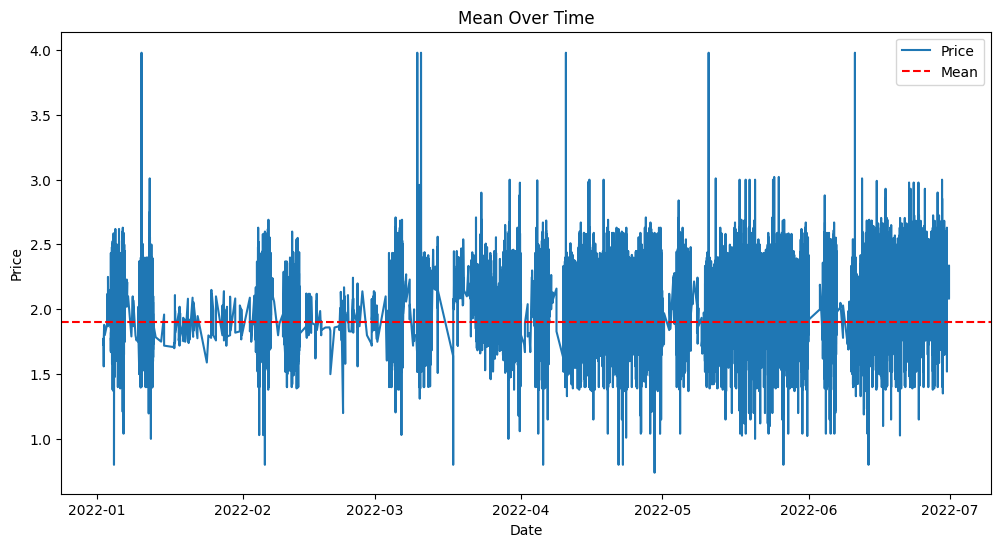

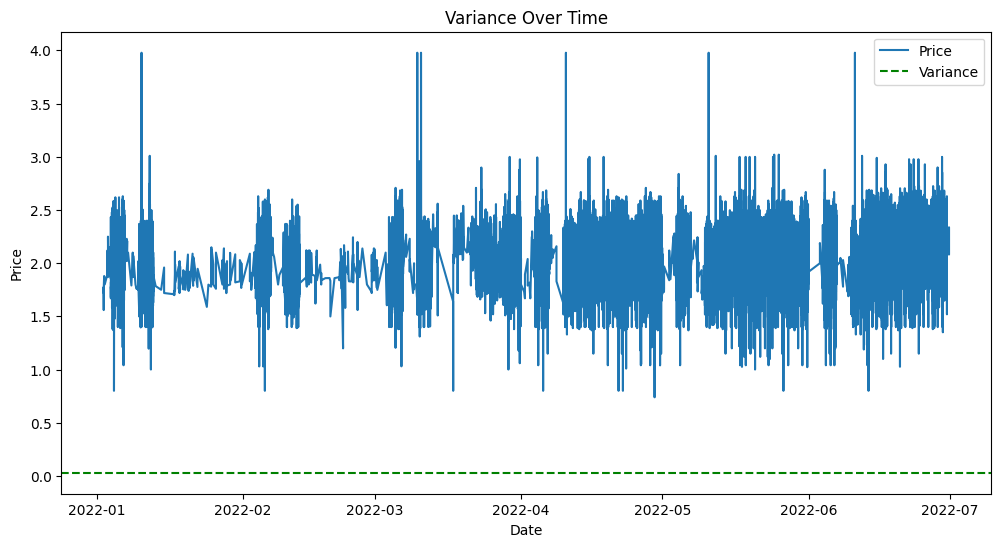

In [ ]:
##Descriptive Statistics Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Price')
plt.axhline(y=mean_over_time, color='red', linestyle='--', label='Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Mean Over Time')
plt.legend()
plt.show()

# Plot the variance over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Price')
plt.axhline(y=variance_over_time, color='green', linestyle='--', label='Variance')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Variance Over Time')
plt.legend()
plt.show()

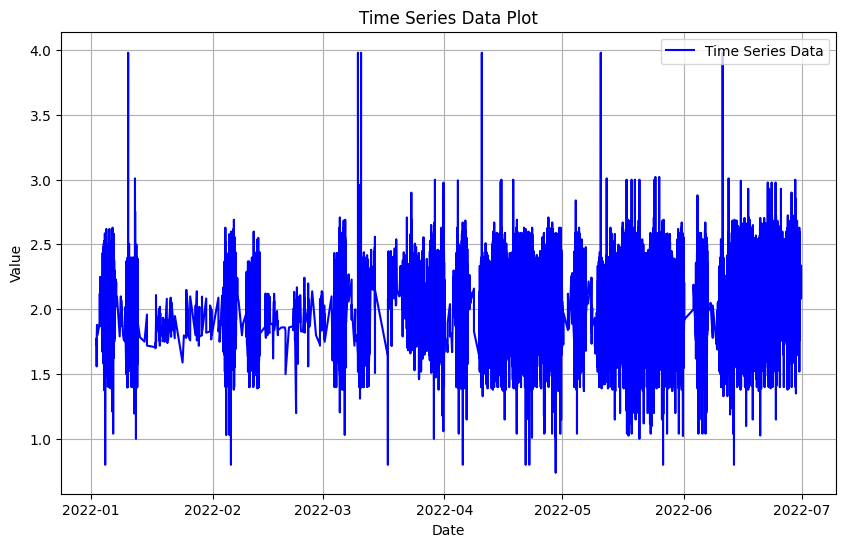

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Time Series Data', color='blue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data Plot')
plt.legend()
plt.grid(True)
plt.show()

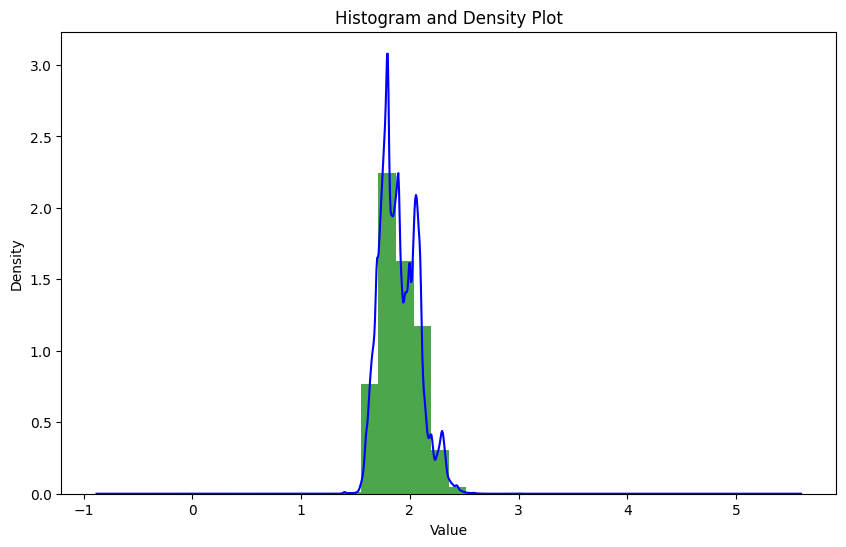

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20, color='green', alpha=0.7, density=True)
df['Price'].plot(kind='kde', color='blue')
plt.xlabel('Value')
plt.title('Histogram and Density Plot')
plt.show()

<Axes: xlabel='Date'>

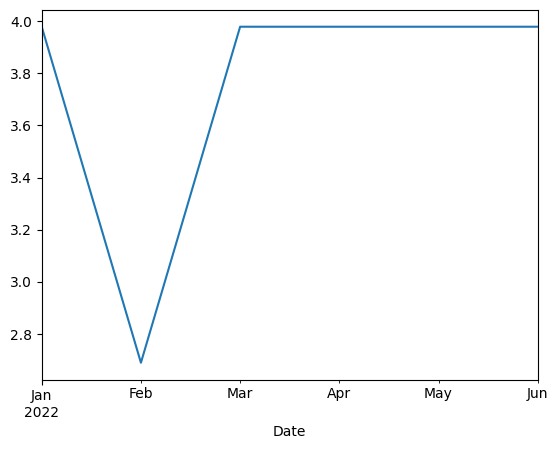

In [ ]:
# Time Resampling For Month Wise

df['Price'].resample(rule='M').max().plot()

<Axes: xlabel='Date'>

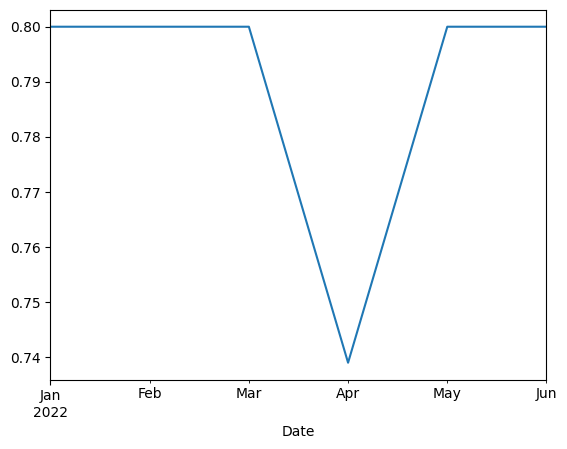

In [ ]:
df['Price'].resample(rule='M').min().plot()

<Axes: xlabel='Date'>

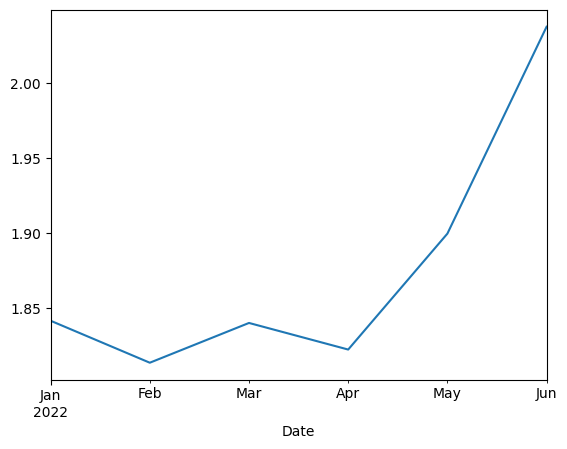

In [ ]:
df['Price'].resample(rule='M').mean().plot()

<Axes: xlabel='Date'>

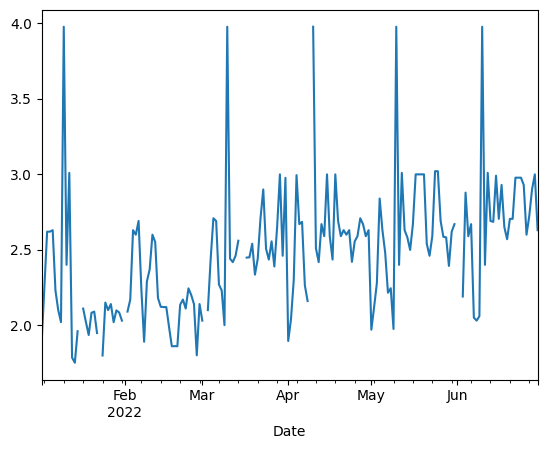

In [ ]:
# Time Resampling for Daily
df['Price'].resample(rule='D').max().plot()


<Axes: xlabel='Date'>

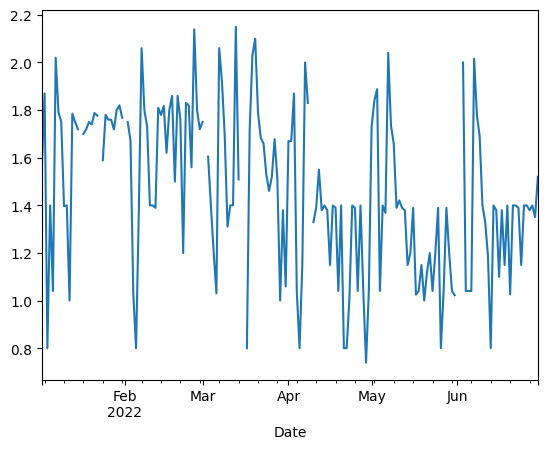

In [ ]:
df['Price'].resample(rule='D').min().plot()

<Axes: xlabel='Date'>

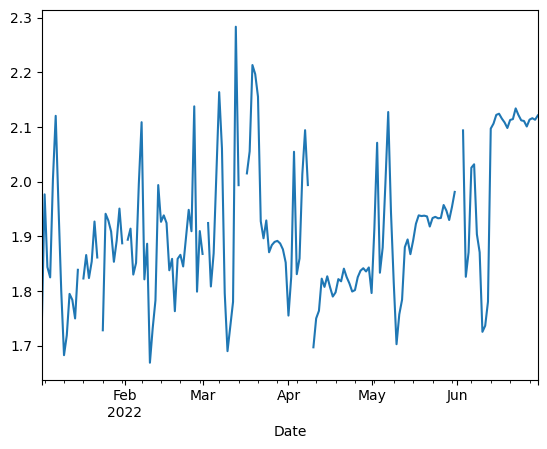

In [ ]:
df['Price'].resample(rule='D').mean().plot()

[]

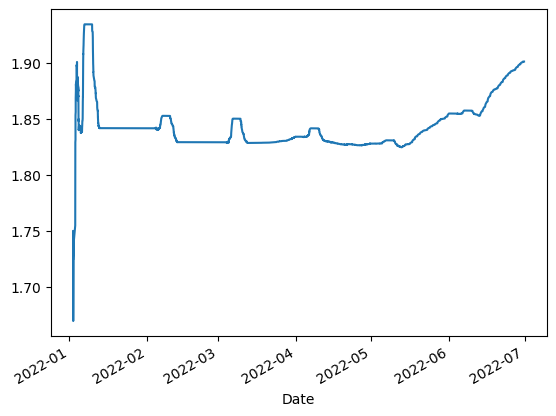

In [ ]:
# Expanding Mean Plot of Price
df['Price'].expanding().mean().plot().plot(figsize=(10,5))

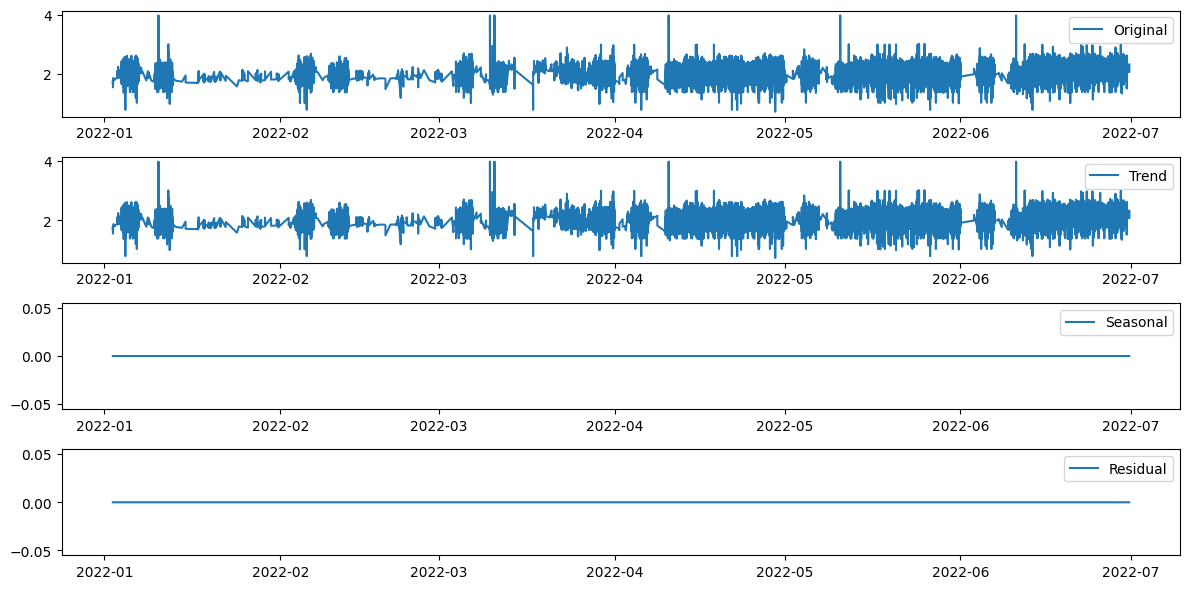

In [ ]:
# Performing seasonal decomposition

result_add = sm.tsa.seasonal_decompose(x=df['Price'], model='additive', extrapolate_trend='freq', period=1)
# Plot the original time series
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(df['Price'], label='Original')
plt.legend()

# Plot the trend component
plt.subplot(412)
plt.plot(result_add.trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(413)
plt.plot(result_add.seasonal, label='Seasonal')
plt.legend()

# Plot the residual component
plt.subplot(414)
plt.plot(result_add.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
trend = result_add.trend
seasonal = result_add.seasonal
residual = result_add.resid

print('Trend',trend)
print('Seasonality',seasonal)
print('residual',residual)

Trend Date
2022-01-02 11:15:08    1.725
2022-01-02 11:15:08    1.775
2022-01-02 11:27:01    1.729
2022-01-02 12:07:25    1.559
2022-01-02 12:07:25    1.559
                       ...  
2022-06-30 09:06:38    2.309
2022-06-30 09:06:38    2.089
2022-06-30 18:20:23    2.084
2022-06-30 18:20:23    2.337
2022-06-30 18:21:56    2.084
Name: trend, Length: 1205459, dtype: float64
Seasonality Date
2022-01-02 11:15:08    0.0
2022-01-02 11:15:08    0.0
2022-01-02 11:27:01    0.0
2022-01-02 12:07:25    0.0
2022-01-02 12:07:25    0.0
                      ... 
2022-06-30 09:06:38    0.0
2022-06-30 09:06:38    0.0
2022-06-30 18:20:23    0.0
2022-06-30 18:20:23    0.0
2022-06-30 18:21:56    0.0
Name: seasonal, Length: 1205459, dtype: float64
residual Date
2022-01-02 11:15:08    0.0
2022-01-02 11:15:08    0.0
2022-01-02 11:27:01    0.0
2022-01-02 12:07:25    0.0
2022-01-02 12:07:25    0.0
                      ... 
2022-06-30 09:06:38    0.0
2022-06-30 09:06:38    0.0
2022-06-30 18:20:23    0.0
2022-0

3. Model Building

Stationarity Check

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


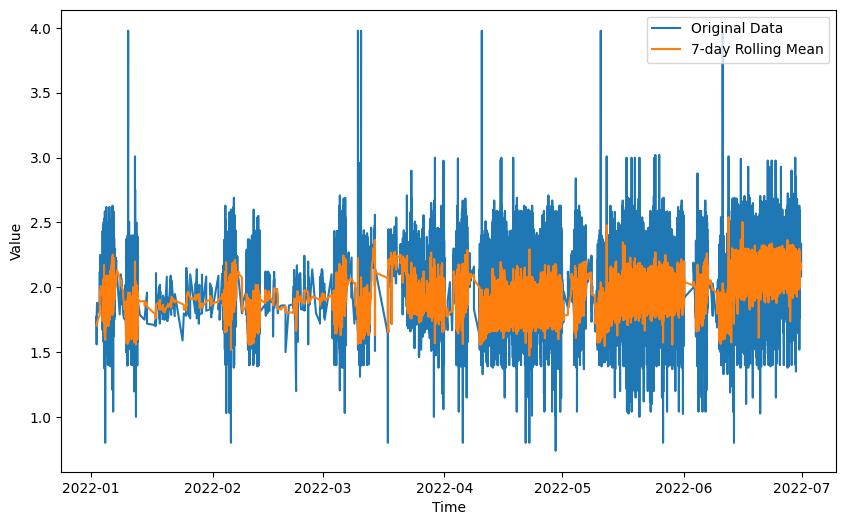

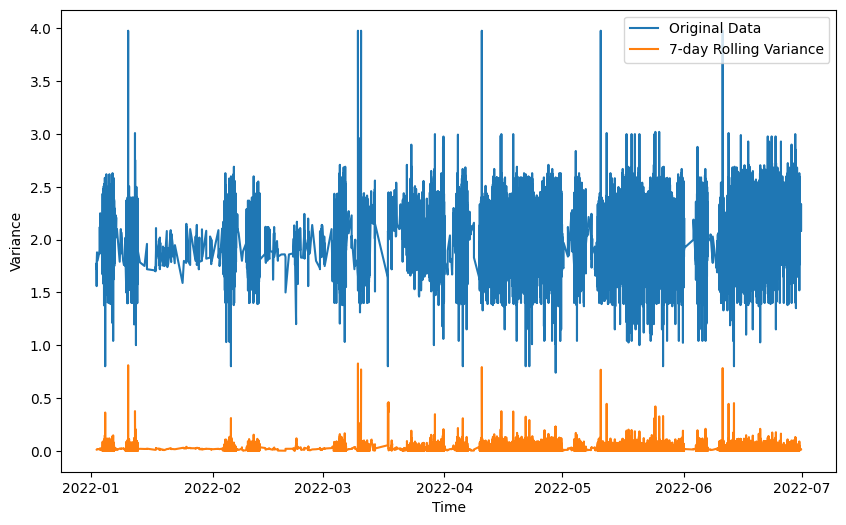

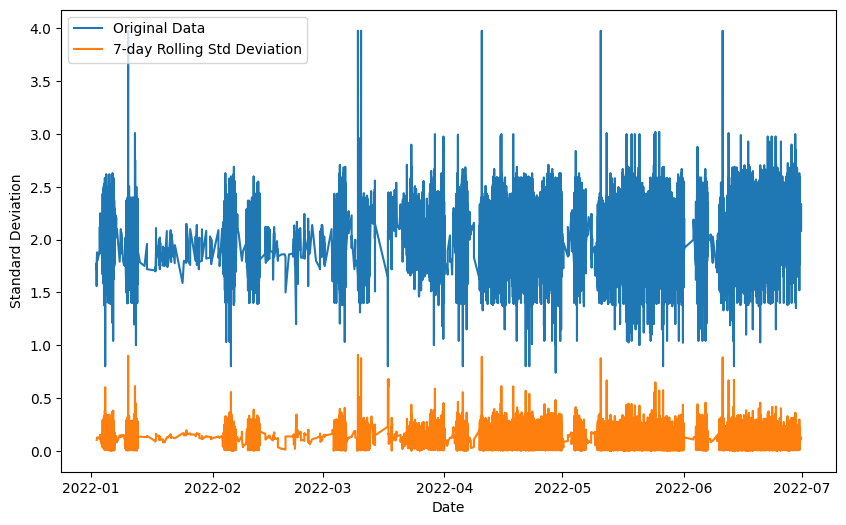

In [ ]:
#Rolling statistics


window_size = 7
rolling_mean = df['Price'].rolling(window=window_size).mean()


# Plot the rolling mean
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Original Data')
plt.plot(df.index, rolling_mean, label=f'{window_size}-day Rolling Mean')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

rolling_variance =df['Price'].rolling(window=window_size).var()

# Plot the rolling variance
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Original Data')
plt.plot(df.index, rolling_variance, label=f'{window_size}-day Rolling Variance')
plt.xlabel('Time')
plt.ylabel('Variance')
plt.legend()
plt.show()

rolling_std = df['Price'].rolling(window=window_size).std()

# Plot the rolling standard deviation
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Original Data')
plt.plot(df.index, rolling_std, label=f'{window_size}-day Rolling Std Deviation')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()



In [ ]:
#By Keeping Data in chunk size to determine stationarity
from statsmodels.tsa.stattools import adfuller

chunk_size = 240000  # Adjust this value based on your memory capacity
data_chunks = [df['Price'][i:i+chunk_size] for i in range(0, len(df['Price']), chunk_size)]



In [ ]:
data_chunks

[Date
 2022-01-02 11:15:08    1.725
 2022-01-02 11:15:08    1.775
 2022-01-02 11:27:01    1.729
 2022-01-02 12:07:25    1.559
 2022-01-02 12:07:25    1.559
                        ...  
 2022-03-29 16:11:46    1.825
 2022-03-29 16:11:51    1.779
 2022-03-29 16:11:51    1.879
 2022-03-29 16:12:08    1.816
 2022-03-29 16:12:08    1.816
 Name: Price, Length: 240000, dtype: float32,
 Date
 2022-03-29 16:12:52    2.039
 2022-03-29 16:12:52    1.814
 2022-03-29 16:12:57    1.874
 2022-03-29 16:12:57    1.874
 2022-03-29 16:13:17    1.839
                        ...  
 2022-04-25 00:16:05    1.759
 2022-04-25 00:16:05    1.729
 2022-04-25 00:16:05    1.779
 2022-04-25 00:16:05    2.019
 2022-04-25 00:16:05    2.009
 Name: Price, Length: 240000, dtype: float32,
 Date
 2022-04-25 00:16:05    1.794
 2022-04-25 00:16:05    1.964
 2022-04-25 00:16:05    1.979
 2022-04-25 00:16:05    2.019
 2022-04-25 00:16:05    1.749
                        ...  
 2022-05-18 07:34:06    1.839
 2022-05-18 07:34:07

In [ ]:
for chunk in data_chunks:
    result = adfuller(chunk, autolag='AIC')
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value}")
    print("Stationary" if result[1] <= 0.05 else "Non-Stationary")

ADF Statistic: -8.665395330268664
p-value: 4.699529671748577e-14
Critical Values:
1%: -3.430377257028397
5%: -2.86155204725694
10%: -2.5667764123198147
Stationary
ADF Statistic: -14.279812304053138
p-value: 1.3299282867016112e-26
Critical Values:
1%: -3.430377257028397
5%: -2.86155204725694
10%: -2.5667764123198147
Stationary
ADF Statistic: -12.841134755016741
p-value: 5.603849084812793e-24
Critical Values:
1%: -3.430377257028397
5%: -2.86155204725694
10%: -2.5667764123198147
Stationary
ADF Statistic: -11.059908390187276
p-value: 4.8386753832119214e-20
Critical Values:
1%: -3.430377257028397
5%: -2.86155204725694
10%: -2.5667764123198147
Stationary
ADF Statistic: -8.36204029636906
p-value: 2.806612676383403e-13
Critical Values:
1%: -3.430377257028397
5%: -2.86155204725694
10%: -2.5667764123198147
Stationary
ADF Statistic: -13.628915699232262
p-value: 1.738461227778038e-25
Critical Values:
1%: -3.4315528661360912
5%: -2.862071546204342
10%: -2.5670529410654956
Stationary


Auto-correlation (ACF) and partial auto-correlation (PACF) Plots

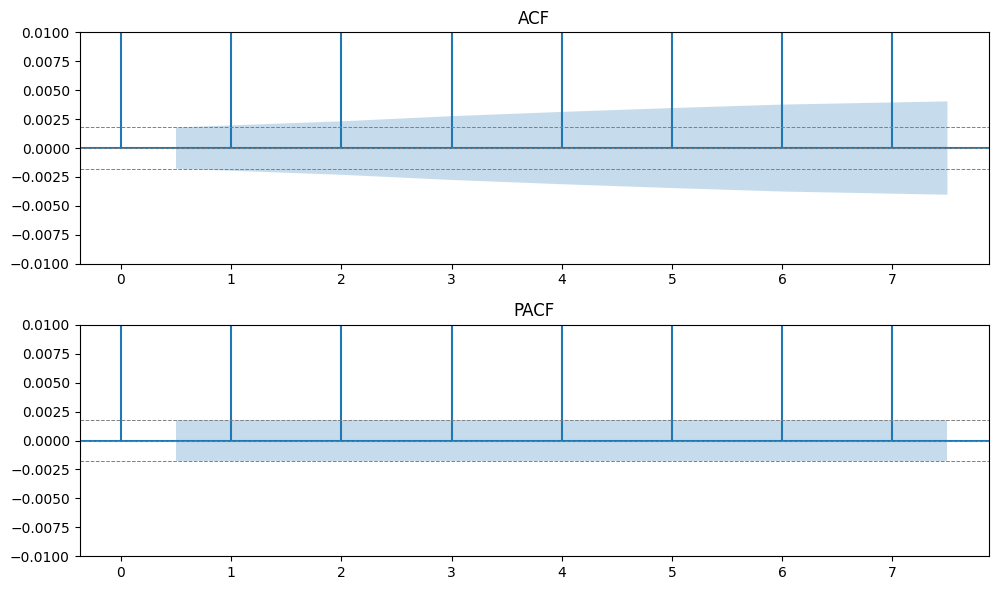

In [ ]:
#Based On Hourly Price  Basis We also considering daily basis & choosen  7 as lags
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot ACF with reference lines at significance levels
plot_acf(df['Price'], lags=7, ax=ax1)  # Change 'lags' as needed
ax1.axhline(y=0, color='gray', linestyle='--', linewidth=0.7)  # Add zero reference line
ax1.axhline(y=-1.96/np.sqrt(len(df['Price'])), color='gray', linestyle='--', linewidth=0.7)  # Add lower bound
ax1.axhline(y=1.96/np.sqrt(len(df['Price'])), color='gray', linestyle='--', linewidth=0.7)  # Add upper bound
ax1.set_ylim(-0.01, 0.01)
ax1.set_title('ACF')

# Plot PACF with reference lines at significance levels
plot_pacf(df['Price'], lags=7, ax=ax2, method ='ols')  # Change 'lags' as needed
ax2.axhline(y=0, color='gray', linestyle='--', linewidth=0.7)  # Add zero reference line
ax2.axhline(y=-1.96/np.sqrt(len(df['Price'])), color='gray', linestyle='--', linewidth=0.7)  # Add lower bound
ax2.axhline(y=1.96/np.sqrt(len(df['Price'])), color='gray', linestyle='--', linewidth=0.7)  # Add upper bound
ax2.set_ylim(-0.01, 0.01)
ax2.set_title('PACF')

plt.tight_layout()
plt.show()

Model Training and Evaluation


In [ ]:
split_point = int(0.8 * len(df['Price']))

# Split the data into training and testing sets
train_data = df['Price'][:split_point]
test_data = df['Price'][split_point:]

# Print the sizes of the training and testing sets
print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")

Training data size: 964367
Testing data size: 241092


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


p, d, q = 7, 0, 7
model = ARIMA(train_data, order=(p, d, q))
results = model.fit()

print(results.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:               964367
Model:                 ARIMA(7, 0, 7)   Log Likelihood              718391.799
Date:                Mon, 09 Oct 2023   AIC                       -1436751.599
Time:                        05:09:52   BIC                       -1436563.131
Sample:                             0   HQIC                      -1436699.658
                             - 964367                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8541      0.007    272.749      0.000       1.841       1.867
ar.L1         -0.5121      0.045    -11.474      0.000      -0.600      -0.425
ar.L2         -0.1855      0.031     -5.973      0.0

In [ ]:
conf_int = results.forecast(steps=241092, alpha=0.05)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
predictions = results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
predictions

964367     1.685004
964368     1.686843
964369     1.685788
964370     1.685697
964371     1.686180
             ...   
1205454    1.854081
1205455    1.854081
1205456    1.854081
1205457    1.854081
1205458    1.854081
Name: predicted_mean, Length: 241092, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data, predictions)

print(f"Mean Squared Error (MAE): {mse}")

Mean Squared Error (MAE): 0.07567898424283505


In [ ]:
from sklearn.metrics import mean_absolute_error

actual_values = test_data  # Replace 'Actual' with the actual column name in your dataset
predicted_values =  predictions  # Replace 'Predicted' with the predicted column name

# Compute the Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.25205137767500096


4.Forecasting

In [ ]:
forecast_steps = 241092  # Adjust the number of steps as needed
forecast = results.forecast(steps=forecast_steps)
print('The Forecast for Time Series',forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


The Forecast for Time Series 964367     1.685004
964368     1.686843
964369     1.685788
964370     1.685697
964371     1.686180
             ...   
1205454    1.854081
1205455    1.854081
1205456    1.854081
1205457    1.854081
1205458    1.854081
Name: predicted_mean, Length: 241092, dtype: float64


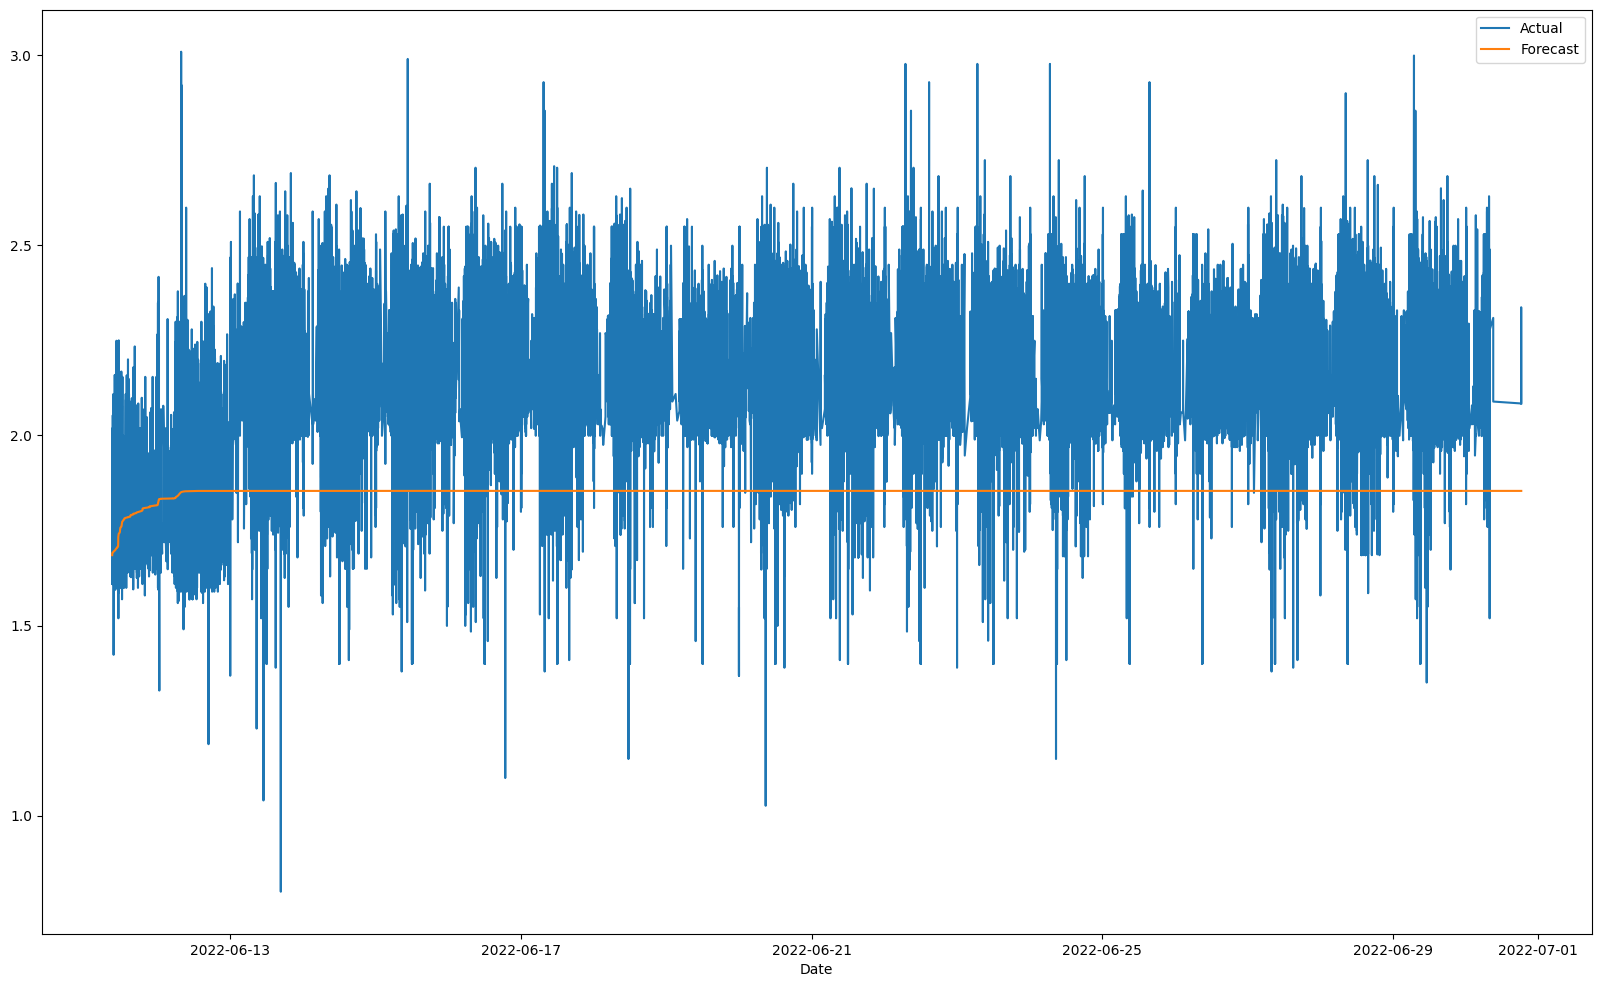

In [ ]:
plt.figure(figsize=(20, 12))

plt.plot(test_data.index, test_data, label='Actual')

plt.plot(test_data.index, forecast, label='Forecast')

plt.xlabel('Date')

plt.legend()
plt.show()



Random Forest Regressor

In [ ]:
df_new = pd.DataFrame()

In [ ]:
df_new['lag_7_y'] = df['Price'].shift(7)


In [ ]:
df_new['Price']=df['Price']

In [ ]:
df_new

,lag_7_y,Price
Date,,
2022-01-02 11:15:08,NaN,1.725
2022-01-02 11:15:08,NaN,1.775
2022-01-02 11:27:01,NaN,1.729
2022-01-02 12:07:25,NaN,1.559
2022-01-02 12:07:25,NaN,1.559
...,...,...
2022-06-30 09:06:38,2.069,2.309
2022-06-30 09:06:38,2.034,2.089
2022-06-30 18:20:23,2.039,2.084


In [ ]:
df_new.dropna(inplace=True)

In [ ]:
test_size = 0.2
split_index = int(len(df_new) * (1 - test_size))
train_data = df_new[:split_index]
test_data = df_new[split_index:]

In [ ]:
X_train = train_data.drop('Price', axis=1)
y_train = train_data['Price']
X_test = test_data.drop('Price', axis=1)
y_test = test_data['Price']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)  # Adjust hyperparameters as needed
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [ ]:
y_pred = rf_regressor.predict(X_test)


Mean Squared Error: 0.04853946610215062
Mean Absolute Error: 0.19191573454580763
R-squared (R2) Score: -1.37357141538889


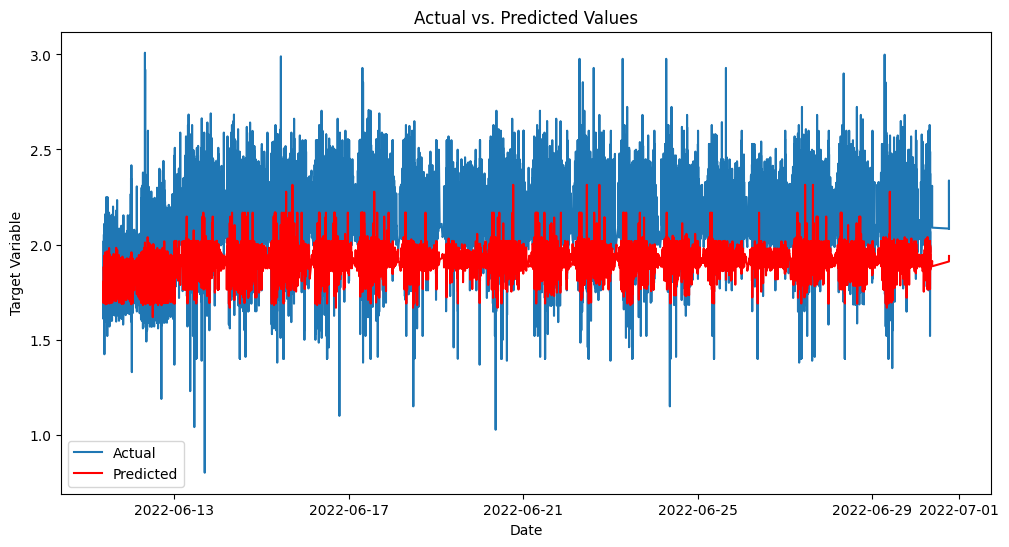

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared (R2) Score: {r2}")

# Visualize actual vs. predicted values for the test set
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual')
plt.plot(test_data.index, y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.show()

Light Gradient Boosting Machine

In [ ]:
import lightgbm as lgb
import numpy as np

In [ ]:
from joblib.externals.loky.backend.resource_tracker import VERBOSE
lgb_params = {
    'objective': 'regression',
    'lambda_l1': 0.1,
    'lambda_l2': 0.2,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.7,
    'max_depth': 6,
    'learning_rate': 0.1,
    'num_leaves': 64,
   'early_stopping_rounds': 10,
    'random_state': 0,
    'n_estimators': 100,
    'metric': 'rmse',
    'verbose': -1,
}

In [ ]:
train1_data = lgb.Dataset(X_train, label=y_train)
test1_data = lgb.Dataset(X_test, label=y_test, reference=train1_data)

In [ ]:
num_round = 100  # Set a large number of boosting rounds
bst = lgb.train(
    lgb_params,
    train1_data,
    num_boost_round=num_round,
    valid_sets=[test1_data]
)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [ ]:
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)


In [ ]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.04908851672790608


In [ ]:
#Cross Validation

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
tscv = TimeSeriesSplit(n_splits=7)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lgb_model = lgb.LGBMRegressor(objective='regression', n_jobs=-1)


In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'num_leaves': [31, 50, 100],
    'n_estimators': [100, 200, 300]
}

In [ ]:
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

In [ ]:
# Initialize lists to store evaluation results
mse_scores = []

for train_index, test_index in tscv.split(df_new):

    train_data, test_data = df_new.iloc[train_index], df_new.iloc[test_index]

    # Extract target variable and features from training and testing sets
    y_train = train_data['Price']
    X_train = train_data.drop(columns=['Price'])

    y_test = test_data['Price']
    X_test = test_data.drop(columns=['Price'])

    # Train your model with the current training set
    lgb_model.fit(X_train, y_train)

    # Make predictions on the current test set
    y_pred = lgb_model.predict(X_test)

    # Calculate Mean Squared Error (MSE) or other relevant evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Optionally, you can also monitor other metrics like Mean Absolute Error (MAE), etc.

# Calculate and print the average MSE score across all splits
average_mse = np.mean(mse_scores)
print(f'Average MSE: {average_mse}')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 150685, number of used features: 1
[LightGBM] [Info] Start training from score 1.828682
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 301366, number of used features: 1
[LightGBM] [Info] Start training from score 1.841064
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is no

Long Short Term Memory Method from Deep Learning

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping




In [ ]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)


In [ ]:
# Extract the target variable and normalize the data
scaler = MinMaxScaler()
df_new['Price'] = scaler.fit_transform(df_new['Price'].values.reshape(-1, 1))

# Define the sequence length (number of time steps to look back)
sequence_length = 10  # Adjust this based on your problem
X, y = create_sequences(df_new['Price'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=6,
    monitor='val_loss',
    mode='min',

    restore_best_weights=True)

In [ ]:
model.fit(X_train, y_train, epochs=24, batch_size=64, verbose=1,callbacks=[early_stopping])


Epoch 1/24
15069/15069 [==============================] - ETA: 0s - loss: 0.0015

15069/15069 [==============================] - 103s 7ms/step - loss: 0.0015
Epoch 2/24
15063/15069 [============================>.] - ETA: 0s - loss: 0.0013

15069/15069 [==============================] - 98s 7ms/step - loss: 0.0013
Epoch 3/24
15067/15069 [============================>.] - ETA: 0s - loss: 0.0013

15069/15069 [==============================] - 99s 7ms/step - loss: 0.0013
Epoch 4/24
15068/15069 [============================>.] - ETA: 0s - loss: 0.0013

15069/15069 [==============================] - 99s 7ms/step - loss: 0.0013
Epoch 5/24
15067/15069 [============================>.] - ETA: 0s - loss: 0.0013

15069/15069 [==============================] - 99s 7ms/step - loss: 0.0013
Epoch 6/24
15063/15069 [============================>.] - ETA: 0s - loss: 0.0013

15069/15069 [==============================] - 101s 7ms/step - loss: 0.0013
Epoch 7/24
15065/15069 [============================>.] - ETA: 0s - loss: 0.0013

15069/15069 [==============================] - 102s 7ms/step - loss: 0.0013
Epoch 8/24
15067/15069 [============================>.] - ETA: 0s - loss: 0.0013

15069/15069 [==============================] - 104s 7ms/step - loss: 0.0013
Epoch 9/24
15066/15069 [============================>.] - ETA: 0s - loss: 0.0013

15069/15069 [==============================] - 105s 7ms/step - loss: 0.0013
Epoch 10/24
15066/15069 [============================>.] - ETA: 0s - loss: 0.0013

15069/15069 [==============================] - 111s 7ms/step - loss: 0.0013
Epoch 11/24
15064/15069 [============================>.] - ETA: 0s - loss: 0.0013

15069/15069 [==============================] - 107s 7ms/step - loss: 0.0013
Epoch 12/24
15063/15069 [============================>.] - ETA: 0s - loss: 0.0013

15069/15069 [==============================] - 105s 7ms/step - loss: 0.0013
Epoch 13/24
15066/15069 [============================>.] - ETA: 0s - loss: 0.0013

15069/15069 [==============================] - 100s 7ms/step - loss: 0.0013
Epoch 14/24
15064/15069 [============================>.] - ETA: 0s - loss: 0.0013

15069/15069 [==============================] - 101s 7ms/step - loss: 0.0013
Epoch 15/24
15065/15069 [============================>.] - ETA: 0s - loss: 0.0013

15069/15069 [==============================] - 100s 7ms/step - loss: 0.0013
Epoch 16/24
15066/15069 [============================>.] - ETA: 0s - loss: 0.0013

15069/15069 [==============================] - 99s 7ms/step - loss: 0.0013
Epoch 17/24
15067/15069 [============================>.] - ETA: 0s - loss: 0.0013

15069/15069 [==============================] - 100s 7ms/step - loss: 0.0013
Epoch 18/24
15066/15069 [============================>.] - ETA: 0s - loss: 0.0012

15069/15069 [==============================] - 98s 7ms/step - loss: 0.0012
Epoch 19/24
15062/15069 [============================>.] - ETA: 0s - loss: 0.0013

15069/15069 [==============================] - 98s 6ms/step - loss: 0.0013
Epoch 20/24
15068/15069 [============================>.] - ETA: 0s - loss: 0.0012

15069/15069 [==============================] - 99s 7ms/step - loss: 0.0012
Epoch 21/24
15063/15069 [============================>.] - ETA: 0s - loss: 0.0012

15069/15069 [==============================] - 101s 7ms/step - loss: 0.0012
Epoch 22/24
15067/15069 [============================>.] - ETA: 0s - loss: 0.0012

15069/15069 [==============================] - 102s 7ms/step - loss: 0.0012
Epoch 23/24
15062/15069 [============================>.] - ETA: 0s - loss: 0.0012

15069/15069 [==============================] - 101s 7ms/step - loss: 0.0012
Epoch 24/24
15063/15069 [============================>.] - ETA: 0s - loss: 0.0012

15069/15069 [==============================] - 98s 7ms/step - loss: 0.0012


In [ ]:
y_pred = model.predict(X_test)

7535/7535 [==============================] - 21s 3ms/step


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0014745215885341167


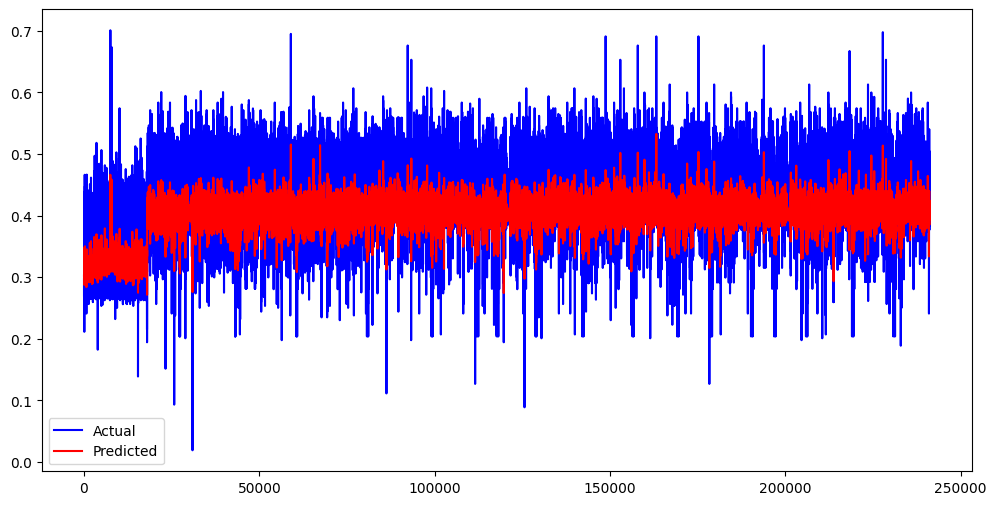

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.legend()
plt.show()

Geo Spatial Analysis for Price fluctuations across All italina Cities

In [ ]:
df

,Id,isSelf,Price,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine
Date,,,,,,,,,,
2022-01-02 11:15:08,44566,1,1.725,BOVE SOCIETA' A RESPONSABILITA' LIMITATA SEMPL...,Esso,1,EASY,GALLIPOLI,40.059120,18.032322
2022-01-02 11:15:08,44566,0,1.775,BOVE SOCIETA' A RESPONSABILITA' LIMITATA SEMPL...,Esso,1,EASY,GALLIPOLI,40.059120,18.032322
2022-01-02 11:27:01,20026,1,1.729,FIARDI TRADING - SOCIETA' A RESPONSABILITA' LI...,Api-Ip,1,IP,CAMPOMARINO,41.938507,15.076976
2022-01-02 12:07:25,12494,0,1.559,BUSSINELLO S.R.L.,Pompe Bianche,1,Impianto Verona Petroli - San Bonifacio,SAN BONIFACIO,45.386059,11.273766
2022-01-02 12:07:25,12494,1,1.559,BUSSINELLO S.R.L.,Pompe Bianche,1,Impianto Verona Petroli - San Bonifacio,SAN BONIFACIO,45.386059,11.273766
...,...,...,...,...,...,...,...,...,...,...
2022-06-30 09:06:38,11159,0,2.309,MODENA S.A.S. DI MODENA NICOLA & C.,Agip Eni,1,eni,SANT'AMBROGIO DI VALPOLICELLA,45.525921,10.816606
2022-06-30 09:06:38,11159,1,2.089,MODENA S.A.S. DI MODENA NICOLA & C.,Agip Eni,1,eni,SANT'AMBROGIO DI VALPOLICELLA,45.525921,10.816606
2022-06-30 18:20:23,49854,1,2.084,CAMEL EXPRESS S.R.L.,Api-Ip,1,IP,PESSANO CON BORNAGO,45.546680,9.392951


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1205459 entries, 2022-01-02 11:15:08 to 2022-06-30 18:21:56
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Id                    1205459 non-null  int64  
 1   isSelf                1205459 non-null  int64  
 2   Price                 1205459 non-null  float32
 3   Fuel_station_manager  1194327 non-null  object 
 4   Petrol_company        1194327 non-null  object 
 5   Type                  1205459 non-null  int64  
 6   Station_name          1194232 non-null  object 
 7   City                  1194225 non-null  object 
 8   Latitude              1205459 non-null  float32
 9   Longitudine           1205459 non-null  float32
dtypes: float32(3), int64(3), object(4)
memory usage: 87.4+ MB


In [ ]:
df.isnull().sum()


Id                          0
isSelf                      0
Price                       0
Fuel_station_manager    11132
Petrol_company          11132
Type                        0
Station_name            11227
City                    11234
Latitude                    0
Longitudine                 0
dtype: int64

Handling Missing Values For Text Data

In [ ]:
columns_to_lowercase = ['Fuel_station_manager', 'Petrol_company','Station_name','City']

In [ ]:
for col in columns_to_lowercase:
    df[col] = df[col].str.lower()


In [ ]:
df

,Id,isSelf,Price,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine
Date,,,,,,,,,,
2022-01-02 11:15:08,44566,1,1.725,bove societa' a responsabilita' limitata sempl...,esso,1,easy,gallipoli,40.059120,18.032322
2022-01-02 11:15:08,44566,0,1.775,bove societa' a responsabilita' limitata sempl...,esso,1,easy,gallipoli,40.059120,18.032322
2022-01-02 11:27:01,20026,1,1.729,fiardi trading - societa' a responsabilita' li...,api-ip,1,ip,campomarino,41.938507,15.076976
2022-01-02 12:07:25,12494,0,1.559,bussinello s.r.l.,pompe bianche,1,impianto verona petroli - san bonifacio,san bonifacio,45.386059,11.273766
2022-01-02 12:07:25,12494,1,1.559,bussinello s.r.l.,pompe bianche,1,impianto verona petroli - san bonifacio,san bonifacio,45.386059,11.273766
...,...,...,...,...,...,...,...,...,...,...
2022-06-30 09:06:38,11159,0,2.309,modena s.a.s. di modena nicola & c.,agip eni,1,eni,sant'ambrogio di valpolicella,45.525921,10.816606
2022-06-30 09:06:38,11159,1,2.089,modena s.a.s. di modena nicola & c.,agip eni,1,eni,sant'ambrogio di valpolicella,45.525921,10.816606
2022-06-30 18:20:23,49854,1,2.084,camel express s.r.l.,api-ip,1,ip,pessano con bornago,45.546680,9.392951


In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def remove_stopwords(text):
    # Tokenize the text into words
    words = text.split()

    # Remove stop words and join the remaining words back into a sentence
    meaningful_words = [word for word in words if word.lower() not in stopwords.words('english')]
    return ' '.join(meaningful_words)

In [ ]:
df['Fuel_station_manager'] = df['Fuel_station_manager'].astype(str)

In [ ]:
df['Fuel_station_manager'] = df['Fuel_station_manager'].apply(remove_stopwords)

In [ ]:
df['Petrol_company'] = df['Petrol_company'].astype(str)

In [ ]:
df['Station_name'] = df['Station_name'].astype(str)

In [ ]:
df['City'] = df['City'].astype(str)

In [ ]:
df['Petrol_company'] = df['Petrol_company'].apply(remove_stopwords)

In [ ]:
df['Station_name'] = df['Station_name'].apply(remove_stopwords)

In [ ]:
df['City'] = df['City'].apply(remove_stopwords)

In [ ]:
df.isnull().sum()


Id                      0
isSelf                  0
Price                   0
Fuel_station_manager    0
Petrol_company          0
Type                    0
Station_name            0
City                    0
Latitude                0
Longitudine             0
dtype: int64

In [ ]:
import geopandas as gpd
import folium
import plotly.express as px

In [ ]:
from shapely.geometry import Point
df['geometry'] = df.apply(lambda row: Point(row['Longitudine'], row['Latitude']), axis=1)


In [ ]:
gdf = df.copy()

In [ ]:
gdf_sp=gpd.GeoDataFrame(gdf, geometry='geometry')

In [ ]:
gdf_sp

,Id,isSelf,Price,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine,geometry
Date,,,,,,,,,,,
2022-01-02 11:15:08,44566,1,1.725,bove societa' responsabilita' limitata semplif...,esso,1,easy,gallipoli,40.059120,18.032322,POINT (18.03232 40.05912)
2022-01-02 11:15:08,44566,0,1.775,bove societa' responsabilita' limitata semplif...,esso,1,easy,gallipoli,40.059120,18.032322,POINT (18.03232 40.05912)
2022-01-02 11:27:01,20026,1,1.729,fiardi trading - societa' responsabilita' limi...,api-ip,1,ip,campomarino,41.938507,15.076976,POINT (15.07698 41.93851)
2022-01-02 12:07:25,12494,0,1.559,bussinello s.r.l.,pompe bianche,1,impianto verona petroli - san bonifacio,san bonifacio,45.386059,11.273766,POINT (11.27377 45.38606)
2022-01-02 12:07:25,12494,1,1.559,bussinello s.r.l.,pompe bianche,1,impianto verona petroli - san bonifacio,san bonifacio,45.386059,11.273766,POINT (11.27377 45.38606)
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30 09:06:38,11159,0,2.309,modena s.a.s. di modena nicola & c.,agip eni,1,eni,sant'ambrogio di valpolicella,45.525921,10.816606,POINT (10.81661 45.52592)
2022-06-30 09:06:38,11159,1,2.089,modena s.a.s. di modena nicola & c.,agip eni,1,eni,sant'ambrogio di valpolicella,45.525921,10.816606,POINT (10.81661 45.52592)
2022-06-30 18:20:23,49854,1,2.084,camel express s.r.l.,api-ip,1,ip,pessano con bornago,45.546680,9.392951,POINT (9.39295 45.54668)


In [ ]:
gdf_sp.reset_index(inplace=True)

In [ ]:
gdf_sp

,Date,Id,isSelf,Price,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine,geometry
0,2022-01-02 11:15:08,44566,1,1.725,bove societa' responsabilita' limitata semplif...,esso,1,easy,gallipoli,40.059120,18.032322,POINT (18.03232 40.05912)
1,2022-01-02 11:15:08,44566,0,1.775,bove societa' responsabilita' limitata semplif...,esso,1,easy,gallipoli,40.059120,18.032322,POINT (18.03232 40.05912)
2,2022-01-02 11:27:01,20026,1,1.729,fiardi trading - societa' responsabilita' limi...,api-ip,1,ip,campomarino,41.938507,15.076976,POINT (15.07698 41.93851)
3,2022-01-02 12:07:25,12494,0,1.559,bussinello s.r.l.,pompe bianche,1,impianto verona petroli - san bonifacio,san bonifacio,45.386059,11.273766,POINT (11.27377 45.38606)
4,2022-01-02 12:07:25,12494,1,1.559,bussinello s.r.l.,pompe bianche,1,impianto verona petroli - san bonifacio,san bonifacio,45.386059,11.273766,POINT (11.27377 45.38606)
...,...,...,...,...,...,...,...,...,...,...,...,...
1205454,2022-06-30 09:06:38,11159,0,2.309,modena s.a.s. di modena nicola & c.,agip eni,1,eni,sant'ambrogio di valpolicella,45.525921,10.816606,POINT (10.81661 45.52592)
1205455,2022-06-30 09:06:38,11159,1,2.089,modena s.a.s. di modena nicola & c.,agip eni,1,eni,sant'ambrogio di valpolicella,45.525921,10.816606,POINT (10.81661 45.52592)
1205456,2022-06-30 18:20:23,49854,1,2.084,camel express s.r.l.,api-ip,1,ip,pessano con bornago,45.546680,9.392951,POINT (9.39295 45.54668)
1205457,2022-06-30 18:20:23,49854,0,2.337,camel express s.r.l.,api-ip,1,ip,pessano con bornago,45.546680,9.392951,POINT (9.39295 45.54668)


In [ ]:
gdf_sp = gdf_sp.set_index('Date')
print("Df shape:",gdf_sp.shape)

Df shape: (1205459, 11)


In [ ]:
gdf_sp = gdf_sp.reset_index(drop=True)

In [ ]:
gdf_sp = gdf_sp.drop('Id', axis=1)

In [ ]:
gdf_sp


,isSelf,Price,Fuel_station_manager,Petrol_company,Type,Station_name,City,Latitude,Longitudine,geometry
0,1,1.725,bove societa' responsabilita' limitata semplif...,esso,1,easy,gallipoli,40.059120,18.032322,POINT (18.03232 40.05912)
1,0,1.775,bove societa' responsabilita' limitata semplif...,esso,1,easy,gallipoli,40.059120,18.032322,POINT (18.03232 40.05912)
2,1,1.729,fiardi trading - societa' responsabilita' limi...,api-ip,1,ip,campomarino,41.938507,15.076976,POINT (15.07698 41.93851)
3,0,1.559,bussinello s.r.l.,pompe bianche,1,impianto verona petroli - san bonifacio,san bonifacio,45.386059,11.273766,POINT (11.27377 45.38606)
4,1,1.559,bussinello s.r.l.,pompe bianche,1,impianto verona petroli - san bonifacio,san bonifacio,45.386059,11.273766,POINT (11.27377 45.38606)
...,...,...,...,...,...,...,...,...,...,...
1205454,0,2.309,modena s.a.s. di modena nicola & c.,agip eni,1,eni,sant'ambrogio di valpolicella,45.525921,10.816606,POINT (10.81661 45.52592)
1205455,1,2.089,modena s.a.s. di modena nicola & c.,agip eni,1,eni,sant'ambrogio di valpolicella,45.525921,10.816606,POINT (10.81661 45.52592)
1205456,1,2.084,camel express s.r.l.,api-ip,1,ip,pessano con bornago,45.546680,9.392951,POINT (9.39295 45.54668)
1205457,0,2.337,camel express s.r.l.,api-ip,1,ip,pessano con bornago,45.546680,9.392951,POINT (9.39295 45.54668)


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
import fiona
print(fiona.__version__)

1.9.4.post1


In [ ]:
import geopandas
print(geopandas.__version__)

0.13.2


In [ ]:
pip install --upgrade geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2


In [ ]:
output_shapefile_path = "output_shapefile.shp"
gdf_sp.to_file(output_shapefile_path)

Streaming output truncated to the last 5000 lines.


Geo Spatial ANalysis is done in separate file due to memory constraints 